In [143]:
import numpy
import pandas
import matplotlib
import seaborn
import tensorflow
import keras

In [144]:
import warnings
warnings.filterwarnings("ignore")

In [145]:
print('Numpy version      :' , numpy.__version__)
print('Pandas version     :' ,pandas.__version__)
print('matplotlib version :' ,matplotlib.__version__)
print('seaborn version    :' , seaborn.__version__)
print('tensorflow version :' , tensorflow.__version__)
print('keras version      :' , keras.__version__)

Numpy version      : 1.16.5
Pandas version     : 0.25.1
matplotlib version : 3.1.1
seaborn version    : 0.9.0
tensorflow version : 2.2.0
keras version      : 2.4.3


In [146]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', None)
import matplotlib.pyplot as plt
plt.rcdefaults()
from pylab import rcParams
import seaborn as sns
%matplotlib inline

####### Deep learning libraries
import tensorflow as tf
import keras
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from ann_visualizer.visualize import ann_viz
# 
from sklearn.preprocessing import  StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import (confusion_matrix, classification_report, accuracy_score, roc_auc_score, auc,
                             precision_score, recall_score, roc_curve, precision_recall_curve,
                             precision_recall_fscore_support, f1_score,
                             precision_recall_fscore_support)
#
from IPython.display import display, Math, Latex

In [147]:
df = pd.read_csv('JADS_CarrerDay_Data.cvs',index_col=0)

In [148]:
df.head()

,V_1,V_2,V_3,V_4,V_5,V_6,V_7,V_8,V_9,Label
0,7.52785,100.0,22.2,47.8,13.0,925,951,938,954,0
1,7.43006,100.0,22.2,47.8,12.9,931,953,935,950,0
2,7.40669,100.0,22.2,47.8,13.0,932,952,937,950,0
3,7.52365,100.0,22.2,47.9,13.0,923,950,942,950,0
4,7.43734,100.0,22.3,47.6,13.3,920,952,945,954,0


In [149]:
df.shape

(4550, 10)

In [150]:
df['Label'].value_counts()

0    4444
1     106
Name: Label, dtype: int64

In [151]:
df.isnull().sum()

V_1      0
V_2      0
V_3      0
V_4      0
V_5      0
V_6      0
V_7      0
V_8      0
V_9      0
Label    0
dtype: int64

In [152]:
df.reset_index(inplace=True, drop= True)

In [153]:
df.index

RangeIndex(start=0, stop=4550, step=1)

In [154]:
df.head()

,V_1,V_2,V_3,V_4,V_5,V_6,V_7,V_8,V_9,Label
0,7.52785,100.0,22.2,47.8,13.0,925,951,938,954,0
1,7.43006,100.0,22.2,47.8,12.9,931,953,935,950,0
2,7.40669,100.0,22.2,47.8,13.0,932,952,937,950,0
3,7.52365,100.0,22.2,47.9,13.0,923,950,942,950,0
4,7.43734,100.0,22.3,47.6,13.3,920,952,945,954,0


In [155]:
df.shape

(4550, 10)

In [156]:
df.Label.value_counts()

0    4444
1     106
Name: Label, dtype: int64

In [157]:
df.Label.value_counts(normalize=True)*100

0    97.67033
1     2.32967
Name: Label, dtype: float64

In [158]:
df.columns

Index(['V_1', 'V_2', 'V_3', 'V_4', 'V_5', 'V_6', 'V_7', 'V_8', 'V_9', 'Label'], dtype='object')

In [159]:
df.dtypes

V_1      float64
V_2      float64
V_3      float64
V_4      float64
V_5      float64
V_6        int64
V_7        int64
V_8        int64
V_9        int64
Label      int64
dtype: object

In [160]:
numerical_cols = ['V_1', 'V_2', 'V_3', 'V_4', 'V_5', 'V_6', 'V_7', 'V_8', 'V_9']

In [161]:
df.Label.unique()

array([0, 1], dtype=int64)

In [162]:
labels = df['Label'].astype(int)
labels[labels != 0] = 1

In [163]:
len(labels[labels !=0])

106

In [164]:
df.Label.value_counts().tolist()

[4444, 106]

Text(0.5, 1.0, 'Data per Label')

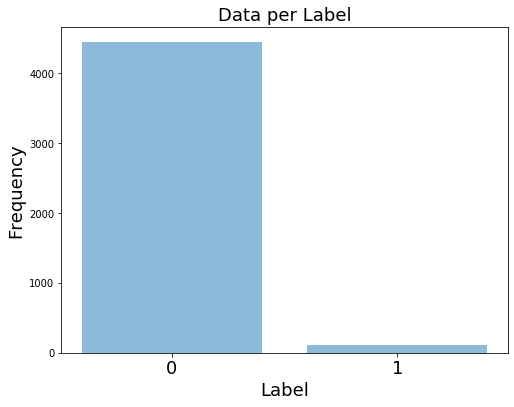

In [165]:
plt.figure(figsize=(8,6))
objects = tuple(['0', '1']) 
y_pos = np.arange(len(objects))
x   = np.arange(len(objects))
y   = df.Label.value_counts().tolist()
#plt.ylim([0, 1.2])
plt.bar(x, y, align='center', alpha=0.5)
plt.xticks(y_pos, objects,fontsize=18)
plt.xlabel('Label', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.title('Data per Label',fontsize=18)

In [166]:
RANDOM_SEED = 101

X_train, X_test = train_test_split(df, test_size=0.2, random_state = RANDOM_SEED)

X_train = X_train[X_train['Label'] == 0]
X_train = X_train.drop(['Label'], axis=1)

y_test  = X_test['Label']
X_test  = X_test.drop(['Label'], axis=1)

X_train = X_train.values
X_test  = X_test.values

print('Training data size   :', X_train.shape)
print('Validation data size :', X_test.shape)

Training data size   : (3558, 9)
Validation data size : (910, 9)


In [167]:
scaler = MinMaxScaler()

In [168]:
scaler

MinMaxScaler()

In [169]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [170]:
X_train_scaled.shape

(3558, 9)

In [171]:
X_test_scaled.shape

(910, 9)

In [172]:
input_dim = X_train.shape[1]

In [173]:
input_dim

9

In [174]:
len(df.columns)

10

In [204]:
encoding_dim = 12

In [205]:
input_layer = Input(shape= (input_dim,))

encoder = Dense(encoding_dim, activation = "tanh", 
                activity_regularizer = regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2 ), activation = "tanh")(encoder)
encoder = Dense(int(encoding_dim / 4 ), activation = "tanh")(encoder)
decoder = Dense(int(encoding_dim / 2 ), activation = "tanh")(encoder)
decoder = Dense(int(encoding_dim) , activation = "tanh")(decoder)
decoder = Dense(input_dim, activation='tanh')(decoder)



In [206]:
autoencoder = Model(inputs = input_layer, outputs=decoder)
autoencoder.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 9)]               0         
_________________________________________________________________
dense_51 (Dense)             (None, 12)                120       
_________________________________________________________________
dense_52 (Dense)             (None, 6)                 78        
_________________________________________________________________
dense_53 (Dense)             (None, 3)                 21        
_________________________________________________________________
dense_54 (Dense)             (None, 6)                 24        
_________________________________________________________________
dense_55 (Dense)             (None, 12)                84        
_________________________________________________________________
dense_56 (Dense)             (None, 9)                 117 

In [207]:
nb_epoch = 100
batch_size = 50
autoencoder.compile(optimizer='adam', loss='mse' )

history = autoencoder.fit(X_train_scaled, X_train_scaled,
                        epochs=nb_epoch,
                        batch_size=batch_size,
                        shuffle=True,
                        validation_split=0.1,
                        verbose=1
                        ).history

Epoch 1/100
65/65 [==============================] - 0s 2ms/step - loss: 0.2564 - val_loss: 0.0778
Epoch 2/100
65/65 [==============================] - 0s 2ms/step - loss: 0.0450 - val_loss: 0.0306
Epoch 3/100
65/65 [==============================] - 0s 1ms/step - loss: 0.0289 - val_loss: 0.0265
Epoch 4/100
65/65 [==============================] - 0s 1ms/step - loss: 0.0268 - val_loss: 0.0253
Epoch 5/100
65/65 [==============================] - 0s 2ms/step - loss: 0.0258 - val_loss: 0.0244
Epoch 6/100
65/65 [==============================] - 0s 1ms/step - loss: 0.0249 - val_loss: 0.0234
Epoch 7/100
65/65 [==============================] - 0s 1ms/step - loss: 0.0238 - val_loss: 0.0221
Epoch 8/100
65/65 [==============================] - 0s 1ms/step - loss: 0.0223 - val_loss: 0.0207
Epoch 9/100
65/65 [==============================] - 0s 1ms/step - loss: 0.0209 - val_loss: 0.0193
Epoch 10/100
65/65 [==============================] - 0s 2ms/step - loss: 0.0196 - val_loss: 0.0182
Epoch 11/

65/65 [==============================] - 0s 1ms/step - loss: 0.0031 - val_loss: 0.0030
Epoch 84/100
65/65 [==============================] - 0s 1ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 85/100
65/65 [==============================] - 0s 1ms/step - loss: 0.0030 - val_loss: 0.0030
Epoch 86/100
65/65 [==============================] - 0s 1ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 87/100
65/65 [==============================] - 0s 1ms/step - loss: 0.0030 - val_loss: 0.0030
Epoch 88/100
65/65 [==============================] - 0s 1ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 89/100
65/65 [==============================] - 0s 1ms/step - loss: 0.0030 - val_loss: 0.0028
Epoch 90/100
65/65 [==============================] - 0s 1ms/step - loss: 0.0029 - val_loss: 0.0029
Epoch 91/100
65/65 [==============================] - 0s 1ms/step - loss: 0.0029 - val_loss: 0.0028
Epoch 92/100
65/65 [==============================] - 0s 1ms/step - loss: 0.0029 - val_loss: 0.0028
Epoch 93/100


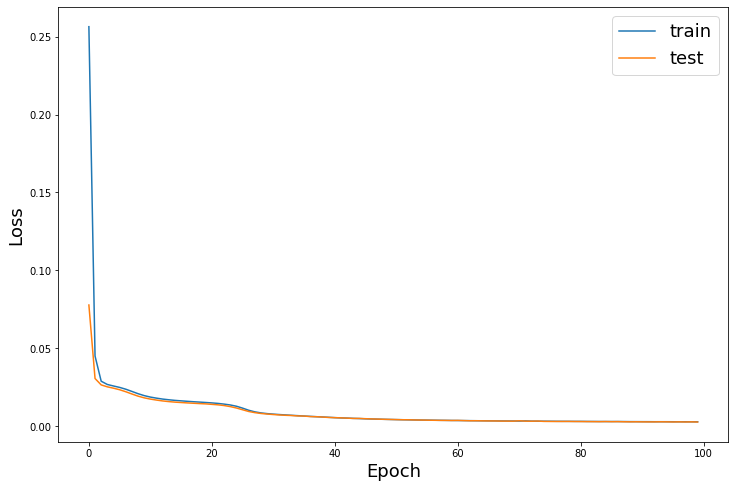

In [208]:
plt.figure(figsize=(12,8))
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.ylabel('Loss',fontsize= 18)
plt.xlabel('Epoch',fontsize= 18)
plt.legend(['train', 'test'], loc='upper right', fontsize= 18);

In [209]:
predictions = autoencoder.predict(X_test_scaled)

In [210]:
mse = np.mean(np.power(X_test_scaled - predictions, 2), axis = 1)

In [211]:
X_test_scaled

array([[0.62376084, 1.        , 0.53846154, ..., 0.8372093 , 0.93726937,
        0.85714286],
       [0.65466181, 1.        , 0.61538462, ..., 0.86976744, 0.85239852,
        0.65306122],
       [0.60439022, 1.        , 0.82051282, ..., 0.54883721, 0.77859779,
        0.49659864],
       ...,
       [0.62884864, 1.        , 0.69230769, ..., 0.82325581, 0.95571956,
        0.8707483 ],
       [0.61920634, 1.        , 0.84615385, ..., 0.73953488, 0.9298893 ,
        0.86394558],
       [0.80988487, 1.        , 0.69230769, ..., 0.46976744, 0.70110701,
        0.49659864]])

In [212]:
predictions

array([[0.63904065, 0.99737114, 0.503886  , ..., 0.8197824 , 0.92461383,
        0.85531014],
       [0.63619286, 0.9972876 , 0.62682587, ..., 0.74943185, 0.8937933 ,
        0.77727896],
       [0.6442009 , 0.9966931 , 0.8464608 , ..., 0.52397543, 0.82657784,
        0.54419655],
       ...,
       [0.6482315 , 0.99671465, 0.70069814, ..., 0.82755345, 0.921287  ,
        0.85921466],
       [0.6386895 , 0.9931417 , 0.8431104 , ..., 0.7794496 , 0.86796117,
        0.8109228 ],
       [0.6239326 , 0.9965568 , 0.842027  , ..., 0.47325236, 0.8967929 ,
        0.6072778 ]], dtype=float32)

In [213]:
df_error = pd.DataFrame({'reconstruction_error': mse, 'Label': y_test}, index=y_test.index)
df_error.describe()

,reconstruction_error,Label
count,910.000000,910.000000
mean,0.002630,0.026374
std,0.003521,0.160332
min,0.000031,0.000000
25%,0.000825,0.000000
50%,0.001515,0.000000
75%,0.003042,0.000000
max,0.031527,1.000000


In [214]:
df_error[df_error['Label'] == 1]

,reconstruction_error,Label
2351,0.001013,1
4031,0.016726,1
2441,0.001342,1
3854,0.002135,1
3823,0.002513,1
71,0.000637,1
3837,0.000891,1
3808,0.001558,1
45,0.002578,1
4231,0.001426,1


Text(0.5, 1.0, 'Outlier Score')

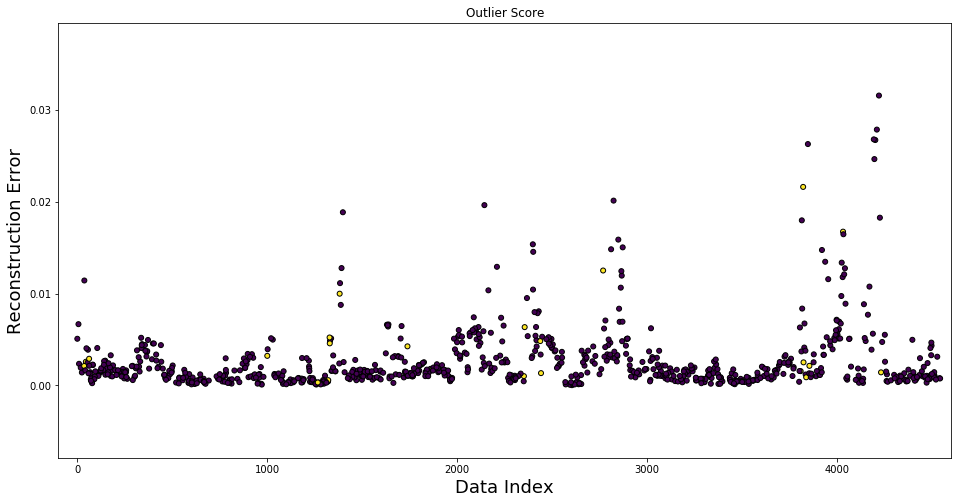

In [215]:

plt.figure(figsize=(16,8))
plt.scatter(df_error.index, df_error['reconstruction_error'],
            c=df_error['Label'], edgecolor='black', s=25)
plt.xlabel('Data Index', fontsize = 18)
plt.ylabel('Reconstruction Error', fontsize = 18)
plt.xlim((-100,4600))
plt.title("Outlier Score")

In [216]:
df_error.sort_values(ascending=False, by = 'reconstruction_error').head(20)

,reconstruction_error,Label
4220,0.031527,0
4209,0.027825,0
4193,0.026763,0
4201,0.026690,0
3846,0.026252,0
4196,0.024618,0
3821,0.021592,1
2823,0.020102,0
2143,0.019611,0
1398,0.018835,0


In [217]:
df_error.describe()

,reconstruction_error,Label
count,910.000000,910.000000
mean,0.002630,0.026374
std,0.003521,0.160332
min,0.000031,0.000000
25%,0.000825,0.000000
50%,0.001515,0.000000
75%,0.003042,0.000000
max,0.031527,1.000000


In [230]:
outliers = df_error.index[df_error.reconstruction_error > 0.02].tolist()

In [231]:
len(outliers)

8

In [232]:
data_n = pd.DataFrame(X_test_scaled, index= y_test.index, columns=numerical_cols)

In [233]:
data_n.head()

,V_1,V_2,V_3,V_4,V_5,V_6,V_7,V_8,V_9
1192,0.623761,1.0,0.538462,0.643411,0.000678,0.991848,0.837209,0.937269,0.857143
2689,0.654662,1.0,0.615385,0.705426,0.000169,0.940217,0.869767,0.852399,0.653061
2351,0.604390,1.0,0.820513,0.643411,0.000508,0.839674,0.548837,0.778598,0.496599
3121,0.667710,1.0,0.743590,0.395349,0.000847,0.836957,0.897674,0.789668,0.789116
4513,0.662489,1.0,0.820513,0.310078,0.001863,0.880435,0.586047,0.826568,0.741497


In [234]:
def compute_error_per_dim(point):
    
    initial_pt = np.array(data_n.loc[point,:]).reshape(1,9)
    reconstrcuted_pt = autoencoder.predict(initial_pt)
    
    return abs(np.array(initial_pt  - reconstrcuted_pt)[0])

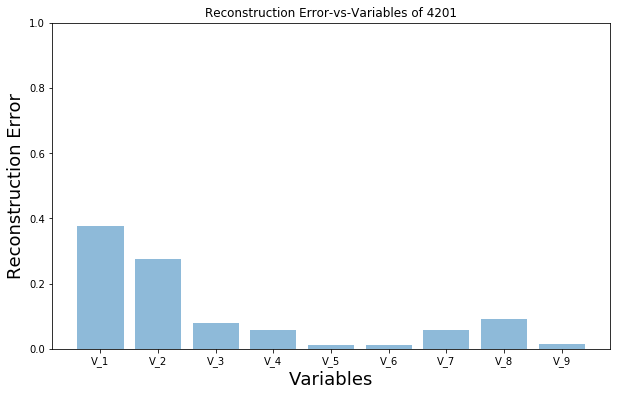

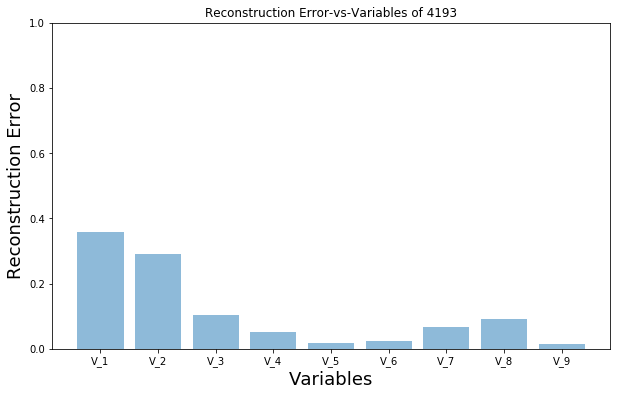

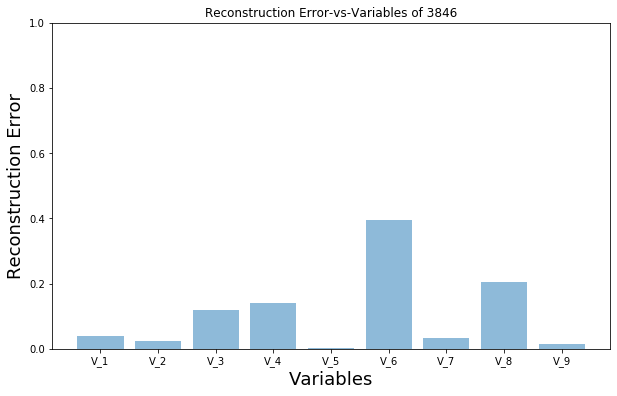

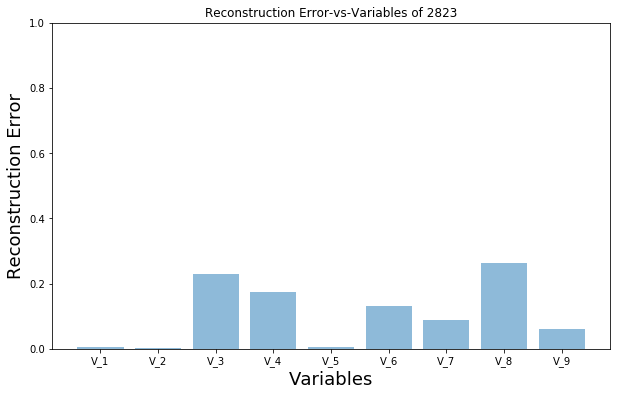

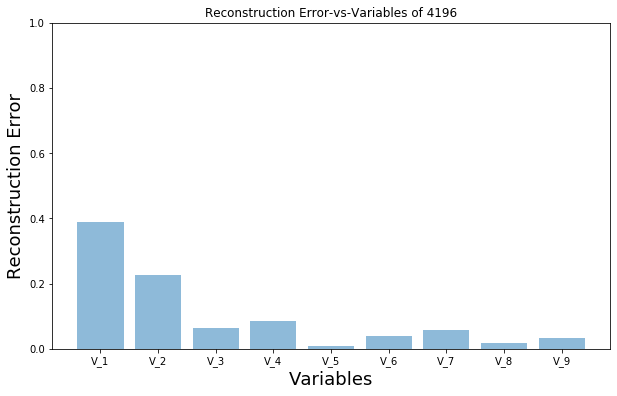

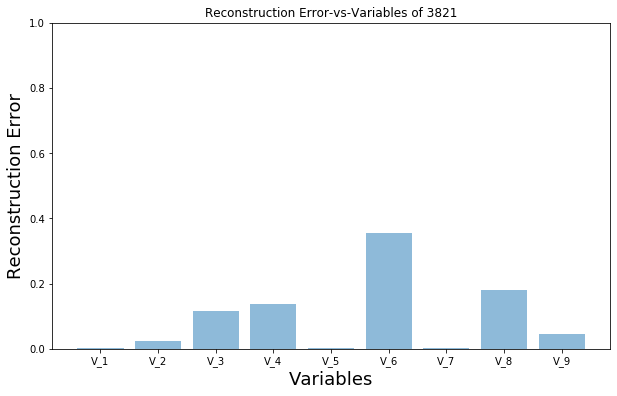

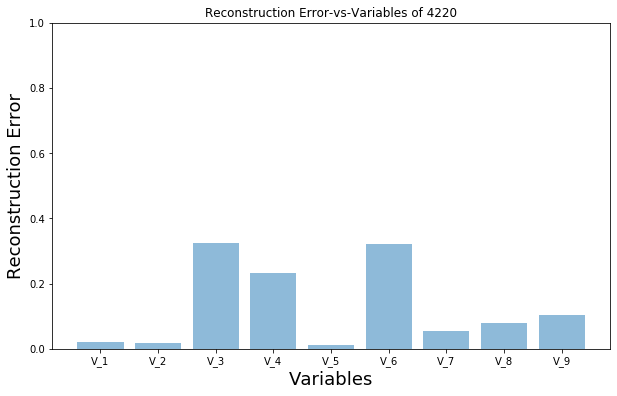

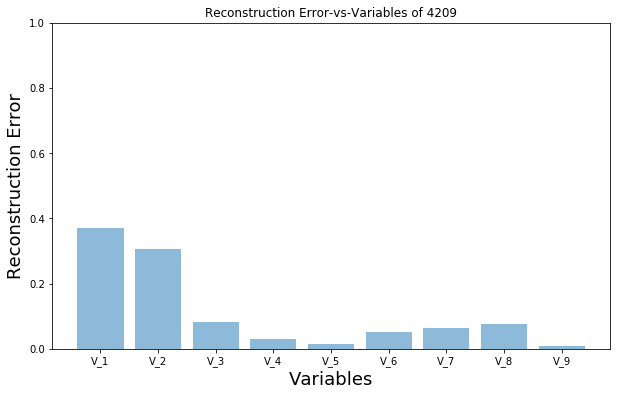

In [235]:
for i in outliers[:10]:
    
    plt.figure(figsize=(10,6))
    objects = tuple(numerical_cols) 
    y_pos   = np.arange(len(objects))
    x       = np.arange(len(objects))
    y       = compute_error_per_dim(i).tolist()
    plt.ylim([0, 1.0])
    plt.bar(x, y, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.xlabel('Variables',fontsize=18)
    plt.ylabel('Reconstruction Error', fontsize=18)
    plt.title('Reconstruction Error-vs-Variables of {}'.format(i))